## Import Data

In [14]:
import pandas as pd

df = df = pd.read_csv("absorbance.csv")

In [15]:
df

,Subject,Gender,DOT,DOB,AgeM,AgeY,Eth1,Eth2,Unnamed: 15,Lang1,...,f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000)
0,8,0,2016-05-12 00:00:00,2006-12-18 00:00:00,112,9.333333,Australian,NaN,0.0,English,...,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,22,0,2016-05-18 00:00:00,2006-10-27 00:00:00,114,9.500000,Australian,NaN,0.0,English,...,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659
2,24,1,2016-05-18 00:00:00,2006-07-02 00:00:00,118,9.833333,Australian,NaN,0.0,English,...,0.4269,0.4142,0.3910,0.3799,0.3740,0.3536,0.3473,0.3237,0.3056,0.2881
3,31,0,2016-05-19 00:00:00,2006-06-01 00:00:00,119,9.916667,Australian,NaN,0.0,English,...,0.0077,0.0123,0.0066,-0.0024,0.0126,0.0231,0.0405,0.0401,0.0391,0.0258
4,42,0,2016-05-20 00:00:00,2008-06-03 00:00:00,95,7.916667,Australian,NaN,0.0,English,...,0.2332,0.2216,0.2228,0.2653,0.2596,0.2576,0.2838,0.3598,0.3953,0.3642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,485,1,2017-07-19 00:00:00,2008-10-20 00:00:00,104,8.666667,Caucasian,NaN,0.0,English,...,0.2221,0.1930,0.1592,0.1549,0.1346,0.1250,0.1125,0.1242,0.1356,0.1372
235,487,0,2017-07-19 00:00:00,2008-10-30 00:00:00,104,8.666667,Anglosaxon,Maori,1.0,English,...,0.5130,0.4766,0.4316,0.4108,0.3587,0.3216,0.2877,0.3026,0.2838,0.2682
236,494,1,2017-07-20 00:00:00,2008-08-27 00:00:00,106,8.833333,Australian,NaN,0.0,English,...,0.6157,0.5506,0.4832,0.4501,0.3983,0.3545,0.3115,0.3136,0.2871,0.2679
237,495,1,2017-07-20 00:00:00,2009-04-10 00:00:00,99,8.250000,Australian,NaN,0.0,English,...,0.3333,0.2819,0.2302,0.2029,0.1586,0.1279,0.0934,0.0612,0.0427,0.0031


In [16]:
wba_df = df.iloc[:,39:].melt(var_name='Frequency', value_name='WBA')
wba_df["Frequency"] = wba_df["Frequency"].str[2:-1].astype(float)
wba_df["WBA"] = wba_df["WBA"].astype(float)
wba_df

,Frequency,WBA
0,226.0,0.0987
1,226.0,0.1114
2,226.0,0.1096
3,226.0,0.0748
4,226.0,0.1863
...,...,...
25568,8000.0,0.1372
25569,8000.0,0.2682
25570,8000.0,0.2679
25571,8000.0,0.0031


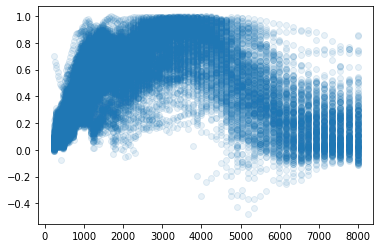

In [17]:
import matplotlib.pyplot as plt

plt.scatter(wba_df["Frequency"], wba_df["WBA"], alpha=0.1)
plt.show()

## GAN Model

In [18]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

torch.manual_seed(111)

In [19]:
train_set = torch.tensor(wba_df[["Frequency","WBA"]].values, dtype=torch.float32)
train_set

tensor([[2.2600e+02, 9.8700e-02],
        [2.2600e+02, 1.1140e-01],
        [2.2600e+02, 1.0960e-01],
        ...,
        [8.0000e+03, 2.6790e-01],
        [8.0000e+03, 3.1000e-03],
        [8.0000e+03, 3.8520e-01]])

In [20]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [29]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2, 16),
        nn.LeakyReLU(0.1),
        nn.Linear(16, 32),
        nn.LeakyReLU(0.1),
        nn.Linear(32, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    output = self.model(x)
    return output

discriminator = Discriminator()

In [30]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2, 16),
        nn.LeakyReLU(0.1),
        nn.Linear(16, 32),
        nn.LeakyReLU(0.1),
        nn.Linear(32, 2),
    )
  
  def forward(self, x):
    output = self.model(x)
    return output

generator = Generator()

In [31]:
lr = 0.001
num_epochs = 150
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [32]:
for epoch in range(num_epochs): # 1 min per 10 epochs
  for n, real_samples in enumerate(train_loader):
    if len(real_samples) != batch_size:
      continue
    
    # Data for training the discriminator
    real_samples_labels = torch.ones((batch_size, 1))
    latent_space_samples = torch.randn((batch_size, 2))
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size, 1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

    # Training the discriminator
    discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samples_labels)
    loss_discriminator.backward()
    optimizer_discriminator.step()

    # Data for training the generator
    latent_space_samples = torch.randn((batch_size, 2))

    # Training the generator
    generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
    loss_generator.backward()
    optimizer_generator.step()

    # Show loss
    if epoch % 10 == 0 and n == batch_size - 1:
      print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
      print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.29267483949661255
Epoch: 0 Loss G.: 0.8198658227920532
Epoch: 10 Loss D.: 0.03348810598254204
Epoch: 10 Loss G.: 6.860405921936035
Epoch: 20 Loss D.: 0.2226039469242096
Epoch: 20 Loss G.: 2.6383752822875977
Epoch: 30 Loss D.: 0.4418756365776062
Epoch: 30 Loss G.: 1.3937633037567139
Epoch: 40 Loss D.: 0.8499751687049866
Epoch: 40 Loss G.: 0.9456368684768677
Epoch: 50 Loss D.: 0.720907986164093
Epoch: 50 Loss G.: 0.7314074039459229
Epoch: 60 Loss D.: 1.112776279449463
Epoch: 60 Loss G.: 0.353077232837677
Epoch: 70 Loss D.: 0.5726898312568665
Epoch: 70 Loss G.: 1.494637370109558
Epoch: 80 Loss D.: 0.4862782955169678
Epoch: 80 Loss G.: 0.9781246781349182
Epoch: 90 Loss D.: 0.8751341104507446
Epoch: 90 Loss G.: 0.4346490800380707
Epoch: 100 Loss D.: 0.6570684909820557
Epoch: 100 Loss G.: 0.757473886013031
Epoch: 110 Loss D.: 0.6706567406654358
Epoch: 110 Loss G.: 0.9046602249145508
Epoch: 120 Loss D.: 1.2767413854599
Epoch: 120 Loss G.: 0.42825764417648315
Epoch: 130 Los

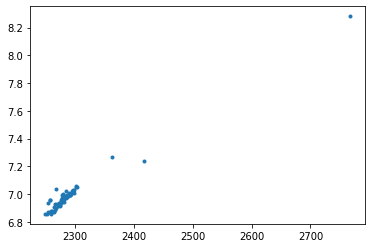

In [34]:
latent_space_samples = torch.randn((batch_size, 2))
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")